In [194]:
#setup with imports
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,  Lasso, LassoCV, Ridge, RidgeCV
import pandas as pd


%pylab inline
%config InlineBackend.figure_formats = ['retina']

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

Populating the interactive namespace from numpy and matplotlib


In [10]:
#bring in full dataframe to check for errors
df_full= pd.read_csv('full_top_1000_df.csv')
df_full

,Rank,Title,Link,Lifetime Gross- Domestic,Year Released,Running Time,Rating,Domestic Opening Gross,Budget,Domestic Distributor,...,Summit Entertainment,The Weinstein Company,TriStar Pictures,Twentieth Century Fox,USA Films,United Artists,United Artists Releasing,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.
0,1,Star Wars: Episode VII - The Force Awakens,https://www.boxofficemojo.com/title/tt2488496/...,936662225,2015,138,3.0,247966675.0,245000000,Walt Disney Studios Motion Pictures,...,0,0,0,0,0,0,0,0,1,0
1,2,Avengers: Endgame,https://www.boxofficemojo.com/title/tt4154796/...,858373000,2019,181,3.0,357115007.0,356000000,Walt Disney Studios Motion Pictures,...,0,0,0,0,0,0,0,0,1,0
2,3,Avatar,https://www.boxofficemojo.com/title/tt0499549/...,760507625,2009,162,3.0,77025481.0,237000000,Twentieth Century Fox,...,0,0,0,1,0,0,0,0,0,0
3,4,Black Panther,https://www.boxofficemojo.com/title/tt1825683/...,700426566,2018,134,3.0,202003951.0,88342356,Walt Disney Studios Motion Pictures,...,0,0,0,0,0,0,0,0,1,0
4,5,Avengers: Infinity War,https://www.boxofficemojo.com/title/tt4154756/...,678815482,2018,149,3.0,257698183.0,88342356,Walt Disney Studios Motion Pictures,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Saw III,https://www.boxofficemojo.com/title/tt0489270/...,80238724,2006,108,4.0,33610391.0,10000000,Lionsgate,...,0,0,0,0,0,0,0,0,0,0
996,997,The Mummy,https://www.boxofficemojo.com/title/tt2345759/...,80227895,2017,111,3.0,31688375.0,125000000,Universal Pictures,...,0,0,0,0,0,0,0,1,0,0
997,998,Disturbia,https://www.boxofficemojo.com/title/tt0486822/...,80209692,2007,105,3.0,22224982.0,20000000,DreamWorks,...,0,0,0,0,0,0,0,0,0,0
998,999,Nacho Libre,https://www.boxofficemojo.com/title/tt0457510/...,80197993,2006,92,2.0,28309599.0,35000000,Paramount Pictures,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#fix any column issues or missing data, as well as getting rid of excess feaaturesb
fixed_df = df_full[['Title','Lifetime Gross- Domestic','Year Released','Running Time', 'Rating','Budget', 'Earliest Release Month','Adventure','Comedy','Action','Drama','Family','Thriller','Fantasy','Sci_Fi','Romance','Animation','Crime','Mystery','Walt Disney Studios Motion Pictures','Warner Bros.','Twentieth Century Fox','Universal Pictures','Paramount Pictures','Sony Pictures Entertainment (SPE)']]
fixed_df.sample()

,Title,Lifetime Gross- Domestic,Year Released,Running Time,Rating,Budget,Earliest Release Month,Adventure,Comedy,Action,...,Romance,Animation,Crime,Mystery,Walt Disney Studios Motion Pictures,Warner Bros.,Twentieth Century Fox,Universal Pictures,Paramount Pictures,Sony Pictures Entertainment (SPE)
72,Jumanji: The Next Level,320314960,2019,123,3.0,125000000,12,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [16]:
fixed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Title                                1000 non-null   object 
 1   Lifetime Gross- Domestic             1000 non-null   int64  
 2   Year Released                        1000 non-null   int64  
 3   Running Time                         1000 non-null   int64  
 4   Rating                               1000 non-null   float64
 5   Budget                               1000 non-null   int64  
 6   Earliest Release Month               1000 non-null   int64  
 7   Adventure                            1000 non-null   int64  
 8   Comedy                               1000 non-null   int64  
 9   Action                               1000 non-null   int64  
 10  Drama                                1000 non-null   int64  
 11  Family                         

In [14]:
fixed_df.to_csv('fixed_df.csv')

In [17]:
#first look into correlations
fixed_df.corr()

,Lifetime Gross- Domestic,Year Released,Running Time,Rating,Budget,Earliest Release Month,Adventure,Comedy,Action,Drama,...,Romance,Animation,Crime,Mystery,Walt Disney Studios Motion Pictures,Warner Bros.,Twentieth Century Fox,Universal Pictures,Paramount Pictures,Sony Pictures Entertainment (SPE)
Lifetime Gross- Domestic,1.000000,0.187549,0.273793,-0.125254,0.441011,-0.027356,0.352164,-0.135995,0.212203,-0.143485,...,-0.083312,0.096657,-0.112040,-0.056314,0.222631,-0.006824,-0.019853,-0.014144,-0.069458,-0.038879
Year Released,0.187549,1.000000,0.033208,0.084208,0.266101,-0.088339,0.224383,-0.000653,0.147012,-0.078949,...,-0.103260,0.057140,0.011610,0.022038,0.001294,0.071748,0.006310,0.033355,-0.092071,0.116106
Running Time,0.273793,0.033208,1.000000,0.312563,0.261395,0.139319,-0.030286,-0.513415,0.233933,0.247241,...,-0.024715,-0.431366,-0.009257,0.066682,-0.093026,0.122278,-0.035699,0.007332,-0.003940,0.013383
Rating,-0.125254,0.084208,0.312563,1.000000,-0.198836,0.004136,-0.421638,-0.282162,0.122105,0.125499,...,-0.040707,-0.508314,0.191707,0.104041,-0.318606,0.149076,-0.074793,0.086766,0.039087,0.034396
Budget,0.441011,0.266101,0.261395,-0.198836,1.000000,-0.064867,0.489243,-0.189387,0.402069,-0.182757,...,-0.157136,0.112998,-0.136245,-0.086834,0.227506,0.062480,-0.014754,-0.080712,-0.014714,0.011280
Earliest Release Month,-0.027356,-0.088339,0.139319,0.004136,-0.064867,1.000000,-0.072396,-0.018384,-0.203875,0.199670,...,0.022849,-0.012039,-0.056624,0.013565,0.007568,0.013128,-0.058224,-0.061656,-0.003429,0.007533
Adventure,0.352164,0.224383,-0.030286,-0.421638,0.489243,-0.072396,1.000000,0.003060,0.316461,-0.305321,...,-0.205140,0.408789,-0.203021,-0.094416,0.216578,-0.026337,0.078681,-0.078058,-0.026334,-0.031200
Comedy,-0.135995,-0.000653,-0.513415,-0.282162,-0.189387,-0.018384,0.003060,1.000000,-0.342107,-0.206494,...,0.185261,0.350134,0.028915,-0.203999,0.085720,-0.114788,0.015990,0.033470,-0.067647,0.086588
Action,0.212203,0.147012,0.233933,0.122105,0.402069,-0.203875,0.316461,-0.342107,1.000000,-0.284603,...,-0.277226,-0.221106,0.067831,-0.082133,-0.057477,0.061766,0.059070,-0.033308,0.036889,0.052163
Drama,-0.143485,-0.078949,0.247241,0.125499,-0.182757,0.199670,-0.305321,-0.206494,-0.284603,1.000000,...,0.156520,-0.064688,0.012675,-0.009544,-0.060765,-0.000588,-0.035804,-0.031706,-0.003695,-0.019202


In [25]:
#combine all top genres into 1
#fixed_df['Top Genres'] = fixed_df['Adventure'] + fixed_df['Comedy'] + fixed_df['Action'] + fixed_df['Drama'] + fixed_df['Family'] + fixed_df['Thriller'] + fixed_df['Fantasy'] + fixed_df['Sci_Fi'] + fixed_df['Romance'] + fixed_df['Animation'] + fixed_df['Crime'] + fixed_df['Mystery']
fixed_df = fixed_df[['Title', 'Lifetime Gross- Domestic', 'Year Released', 'Running Time', 'Rating', 'Budget', 'Earliest Release Month', 'Top Genres', 'Walt Disney Studios Motion Pictures', 'Warner Bros.', 'Twentieth Century Fox', 'Universal Pictures', 'Paramount Pictures', 'Sony Pictures Entertainment (SPE)']]

fixed_df

,Title,Lifetime Gross- Domestic,Year Released,Running Time,Rating,Budget,Earliest Release Month,Top Genres,Walt Disney Studios Motion Pictures,Warner Bros.,Twentieth Century Fox,Universal Pictures,Paramount Pictures,Sony Pictures Entertainment (SPE)
0,Star Wars: Episode VII - The Force Awakens,936662225,2015,138,3.0,245000000,12,3,1,0,0,0,0,0
1,Avengers: Endgame,858373000,2019,181,3.0,356000000,4,4,1,0,0,0,0,0
2,Avatar,760507625,2009,162,3.0,237000000,12,4,0,0,1,0,0,0
3,Black Panther,700426566,2018,134,3.0,88342356,2,3,1,0,0,0,0,0
4,Avengers: Infinity War,678815482,2018,149,3.0,88342356,4,3,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Saw III,80238724,2006,108,4.0,10000000,10,3,0,0,0,0,0,0
996,The Mummy,80227895,2017,111,3.0,125000000,6,4,0,0,0,1,0,0
997,Disturbia,80209692,2007,105,3.0,20000000,4,4,0,0,0,0,0,0
998,Nacho Libre,80197993,2006,92,2.0,35000000,6,2,0,0,0,0,1,0


In [26]:
#Condense Distributor Features to one
fixed_df['Top Distributors'] = fixed_df['Walt Disney Studios Motion Pictures'] + fixed_df['Warner Bros.'] + fixed_df['Twentieth Century Fox'] + fixed_df['Universal Pictures'] + fixed_df['Paramount Pictures'] + fixed_df['Sony Pictures Entertainment (SPE)']
condensed_df = fixed_df[['Title', 'Lifetime Gross- Domestic', 'Year Released', 'Running Time', 'Rating', 'Budget', 'Earliest Release Month', 'Top Genres', 'Top Distributors']]
condensed_df

,Title,Lifetime Gross- Domestic,Year Released,Running Time,Rating,Budget,Earliest Release Month,Top Genres,Top Distributors
0,Star Wars: Episode VII - The Force Awakens,936662225,2015,138,3.0,245000000,12,3,1
1,Avengers: Endgame,858373000,2019,181,3.0,356000000,4,4,1
2,Avatar,760507625,2009,162,3.0,237000000,12,4,1
3,Black Panther,700426566,2018,134,3.0,88342356,2,3,1
4,Avengers: Infinity War,678815482,2018,149,3.0,88342356,4,3,1
...,...,...,...,...,...,...,...,...,...
995,Saw III,80238724,2006,108,4.0,10000000,10,3,0
996,The Mummy,80227895,2017,111,3.0,125000000,6,4,1
997,Disturbia,80209692,2007,105,3.0,20000000,4,4,0
998,Nacho Libre,80197993,2006,92,2.0,35000000,6,2,1


In [28]:
condensed_df.describe()

,Lifetime Gross- Domestic,Year Released,Running Time,Rating,Budget,Earliest Release Month,Top Genres,Top Distributors
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,1.623179e+08,2004.340000,115.744000,2.943380,8.834236e+07,7.344000,3.129000,0.805000
std,1.000574e+08,12.163649,21.143593,0.732658,5.533500e+07,3.255805,1.440289,0.396399
min,8.017213e+07,1937.000000,70.000000,1.000000,1.500000e+04,1.000000,0.000000,0.000000
25%,1.005444e+08,1999.000000,100.000000,2.940000,4.675000e+07,5.000000,2.000000,1.000000
50%,1.279380e+08,2007.000000,115.000000,3.000000,8.834236e+07,7.000000,3.000000,1.000000
75%,1.835802e+08,2013.000000,129.000000,3.000000,1.100000e+08,11.000000,4.000000,1.000000
max,9.366622e+08,2021.000000,238.000000,4.000000,3.560000e+08,12.000000,9.000000,1.000000


In [29]:
condensed_df.to_csv('condensed_df.csv')

In [30]:
#change top genres to binary
condensed_df['Top Genres'].value_counts()

3    293
2    213
4    210
1    124
5     85
6     51
7     16
0      6
9      1
8      1
Name: Top Genres, dtype: int64

In [31]:
#dict to change genre values
genre_binary = {3:1, 2:1, 4:1, 5:1, 6:1, 7:1, 9:1, 8:1}

condensed_df['Top Genres'].replace(genre_binary, inplace= True)
condensed_df

/Users/Christopher/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Title,Lifetime Gross- Domestic,Year Released,Running Time,Rating,Budget,Earliest Release Month,Top Genres,Top Distributors
0,Star Wars: Episode VII - The Force Awakens,936662225,2015,138,3.0,245000000,12,1,1
1,Avengers: Endgame,858373000,2019,181,3.0,356000000,4,1,1
2,Avatar,760507625,2009,162,3.0,237000000,12,1,1
3,Black Panther,700426566,2018,134,3.0,88342356,2,1,1
4,Avengers: Infinity War,678815482,2018,149,3.0,88342356,4,1,1
...,...,...,...,...,...,...,...,...,...
995,Saw III,80238724,2006,108,4.0,10000000,10,1,0
996,The Mummy,80227895,2017,111,3.0,125000000,6,1,1
997,Disturbia,80209692,2007,105,3.0,20000000,4,1,0
998,Nacho Libre,80197993,2006,92,2.0,35000000,6,1,1


In [32]:
condensed_df.describe()

,Lifetime Gross- Domestic,Year Released,Running Time,Rating,Budget,Earliest Release Month,Top Genres,Top Distributors
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,1.623179e+08,2004.340000,115.744000,2.943380,8.834236e+07,7.344000,0.994000,0.805000
std,1.000574e+08,12.163649,21.143593,0.732658,5.533500e+07,3.255805,0.077266,0.396399
min,8.017213e+07,1937.000000,70.000000,1.000000,1.500000e+04,1.000000,0.000000,0.000000
25%,1.005444e+08,1999.000000,100.000000,2.940000,4.675000e+07,5.000000,1.000000,1.000000
50%,1.279380e+08,2007.000000,115.000000,3.000000,8.834236e+07,7.000000,1.000000,1.000000
75%,1.835802e+08,2013.000000,129.000000,3.000000,1.100000e+08,11.000000,1.000000,1.000000
max,9.366622e+08,2021.000000,238.000000,4.000000,3.560000e+08,12.000000,1.000000,1.000000


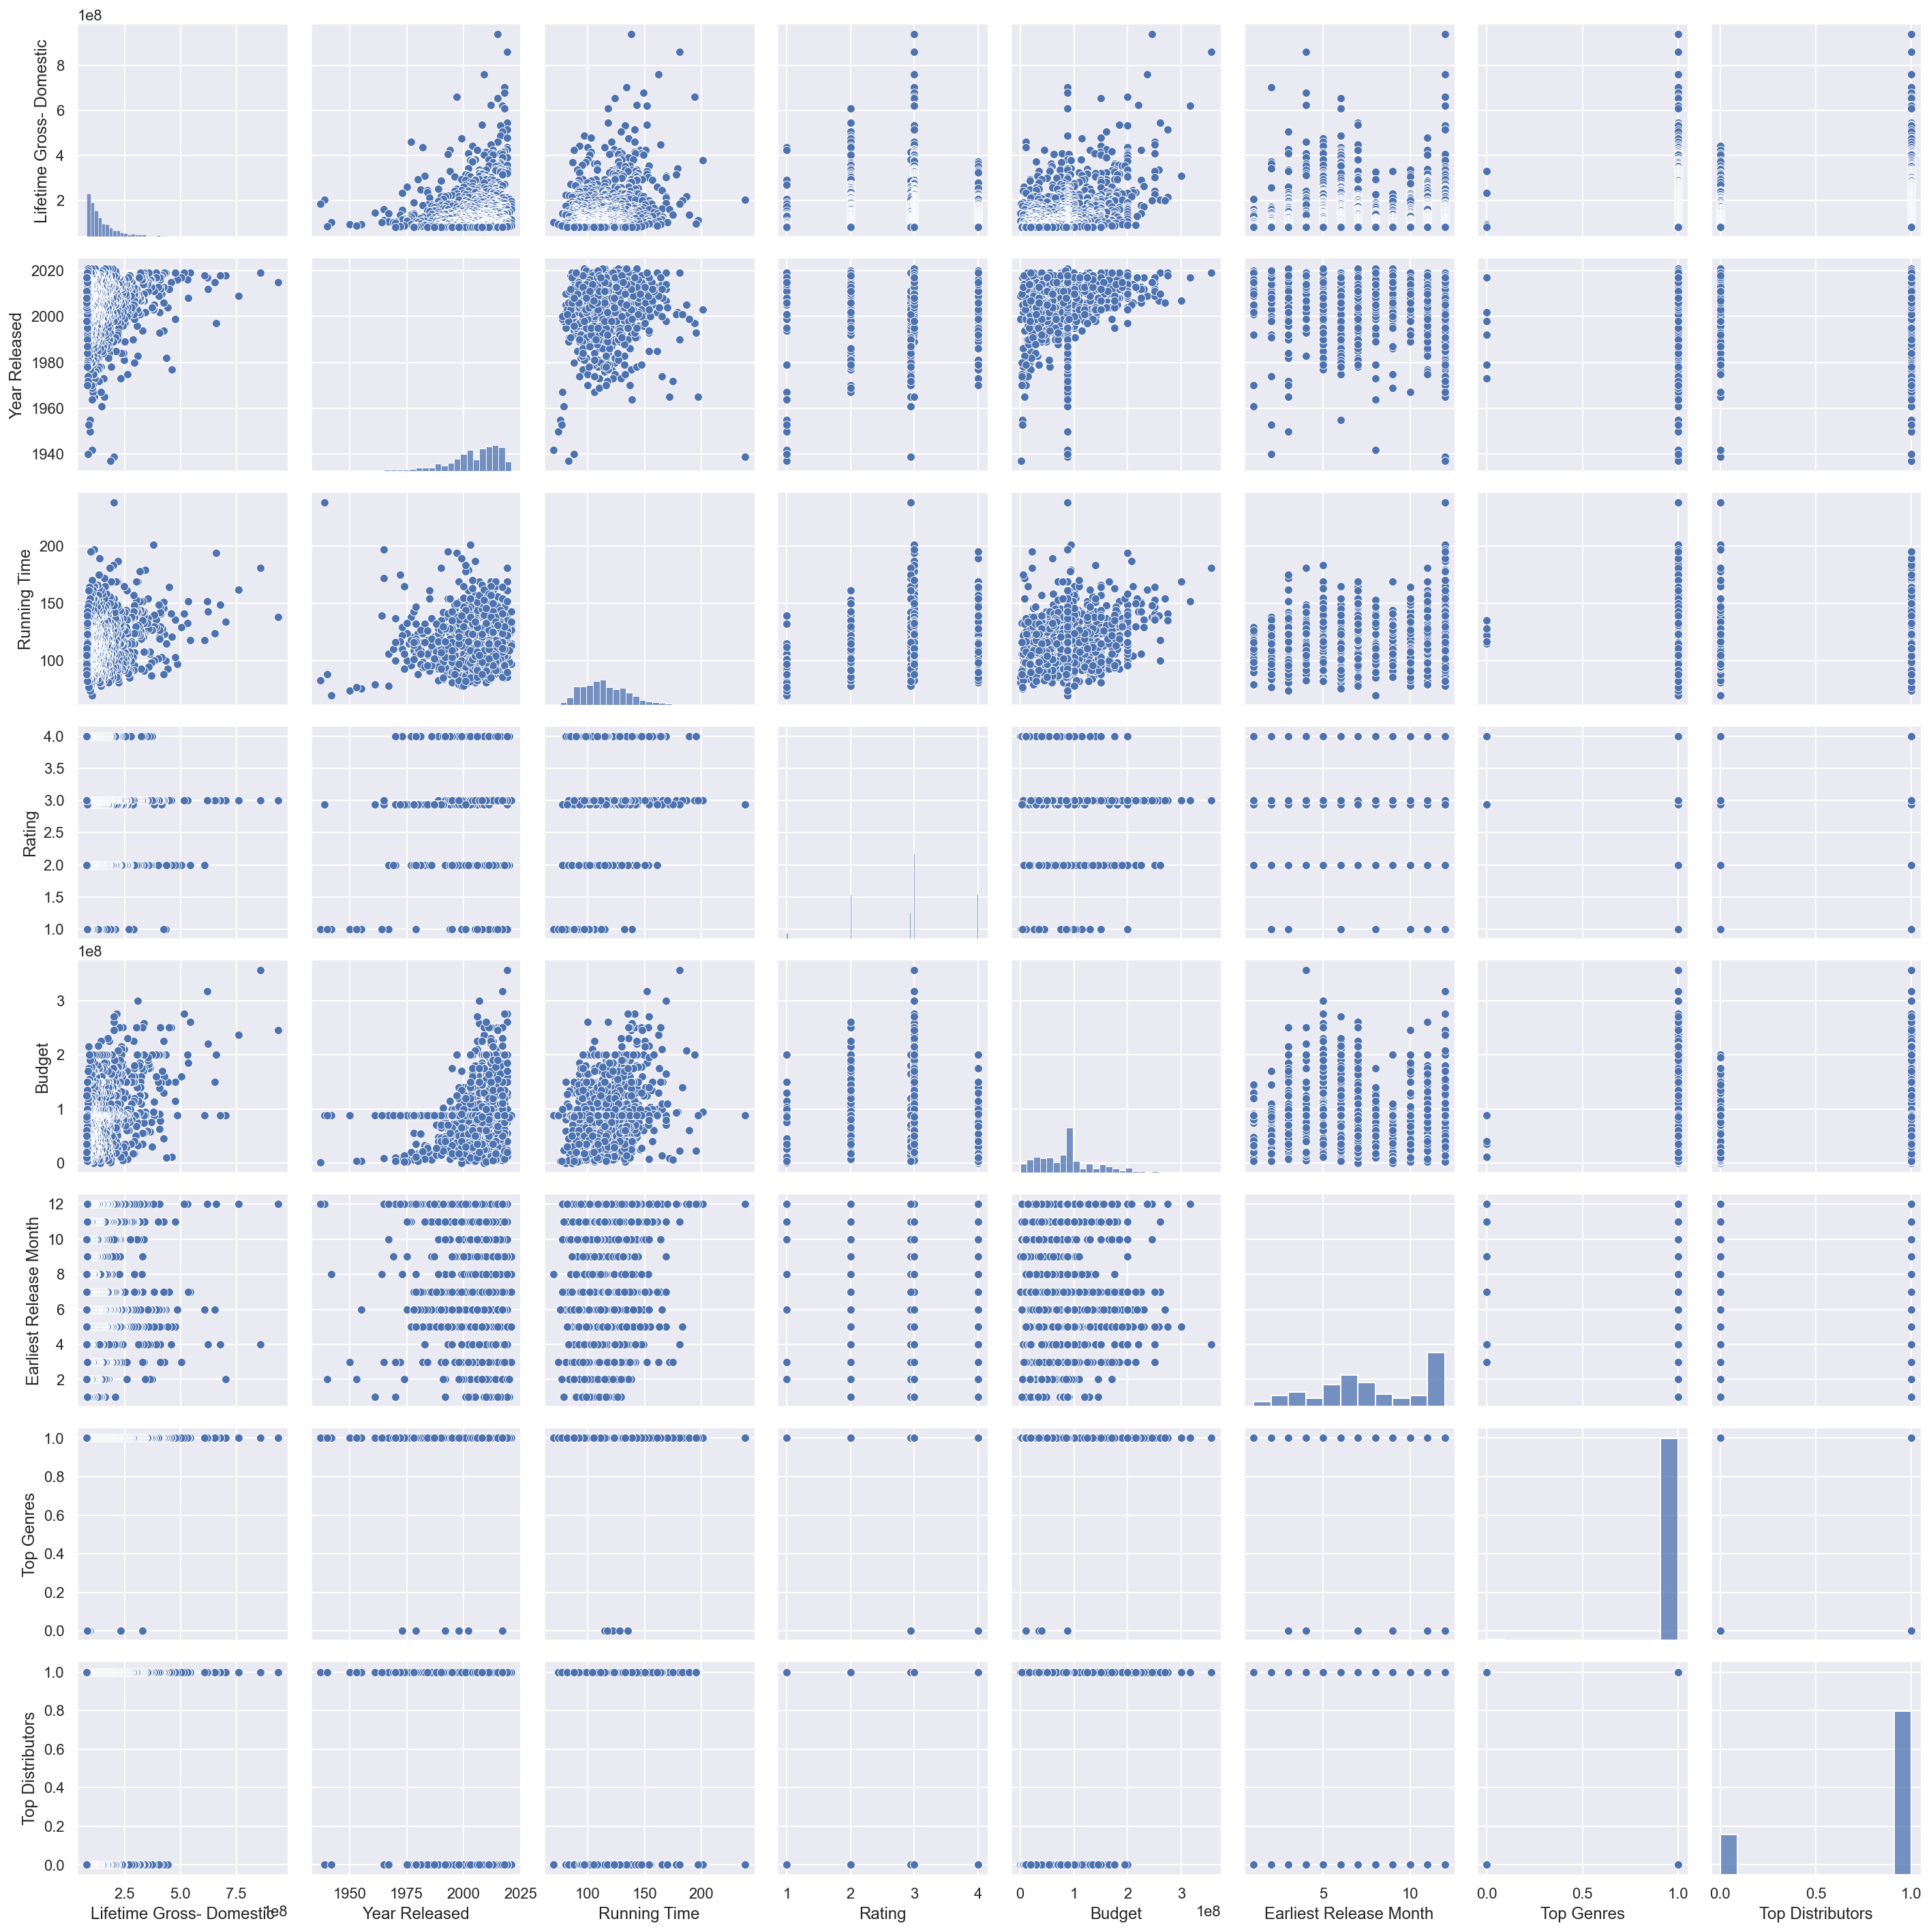

In [38]:
#initial feature target relationships
sns.pairplot(condensed_df)

In [221]:
condensed_df.corr()

,Lifetime Gross- Domestic,Year Released,Running Time,Rating,Budget,Earliest Release Month,Top Genres,Top Distributors
Lifetime Gross- Domestic,1.000000,0.187549,0.273793,-0.125254,0.441011,-0.027356,0.008112,0.089791
Year Released,0.187549,1.000000,0.033208,0.084208,0.266101,-0.088339,0.069273,0.115076
Running Time,0.273793,0.033208,1.000000,0.312563,0.261395,0.139319,-0.022999,0.009803
Rating,-0.125254,0.084208,0.312563,1.000000,-0.198836,0.004136,-0.055872,-0.093684
Budget,0.441011,0.266101,0.261395,-0.198836,1.000000,-0.064867,0.041915,0.189392
Earliest Release Month,-0.027356,-0.088339,0.139319,0.004136,-0.064867,1.000000,-0.007704,-0.079050
Top Genres,0.008112,0.069273,-0.022999,-0.055872,0.041915,-0.007704,1.000000,0.092492
Top Distributors,0.089791,0.115076,0.009803,-0.093684,0.189392,-0.079050,0.092492,1.000000


<AxesSubplot:>

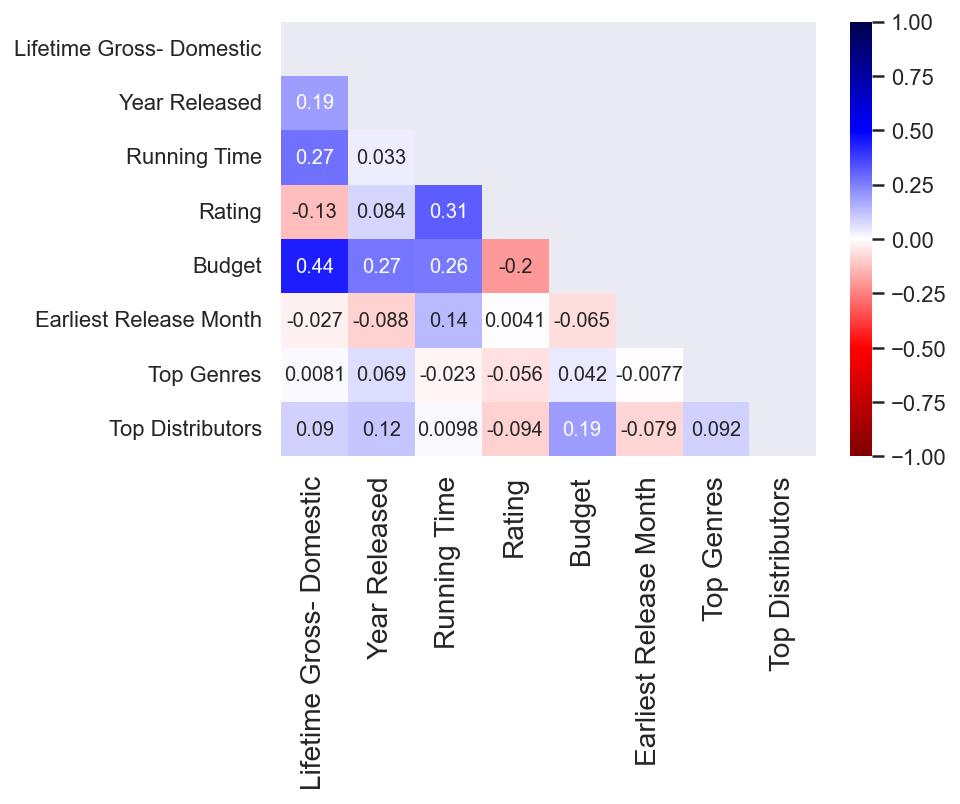

In [222]:
#Budget and Running Time were highest corr

upper= np.triu(condensed_df.corr())
sns.heatmap(condensed_df.corr(), cmap = "seismic_r", annot = True, vmin = -1, vmax = 1, mask =upper)

In [223]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(df_X):

    vif_data = [variance_inflation_factor(df_X.values, i)
                for i in range(df_X.shape[1])]
    
    return pd.Series(vif_data, index=df_X.columns)

In [232]:
#VIF shows extremely high for Year released, top genres

vif(condensed_df.iloc[:, 2:])

Year Released             216.642026
Running Time               40.216108
Rating                     21.324971
Budget                      4.400604
Earliest Release Month      6.343536
Top Genres                169.176488
Top Distributors            5.405030
dtype: float64

In [259]:
#base model simple linear regression
features, target = ['Year Released', 'Running Time', 'Rating', 'Budget', 'Earliest Release Month','Top Genres','Top Distributors'], 'Lifetime Gross- Domestic'
X, y = condensed_df[features], condensed_df[target]


lm = LinearRegression()
lm.fit(X, y) 

print(lm.intercept_)
print(lm.coef_)

-1660216133.7272058
[ 8.61636395e+05  1.11247669e+06 -1.97096682e+07  5.81725752e-01
 -9.06651106e+05 -2.00982665e+07  2.15350291e+04]


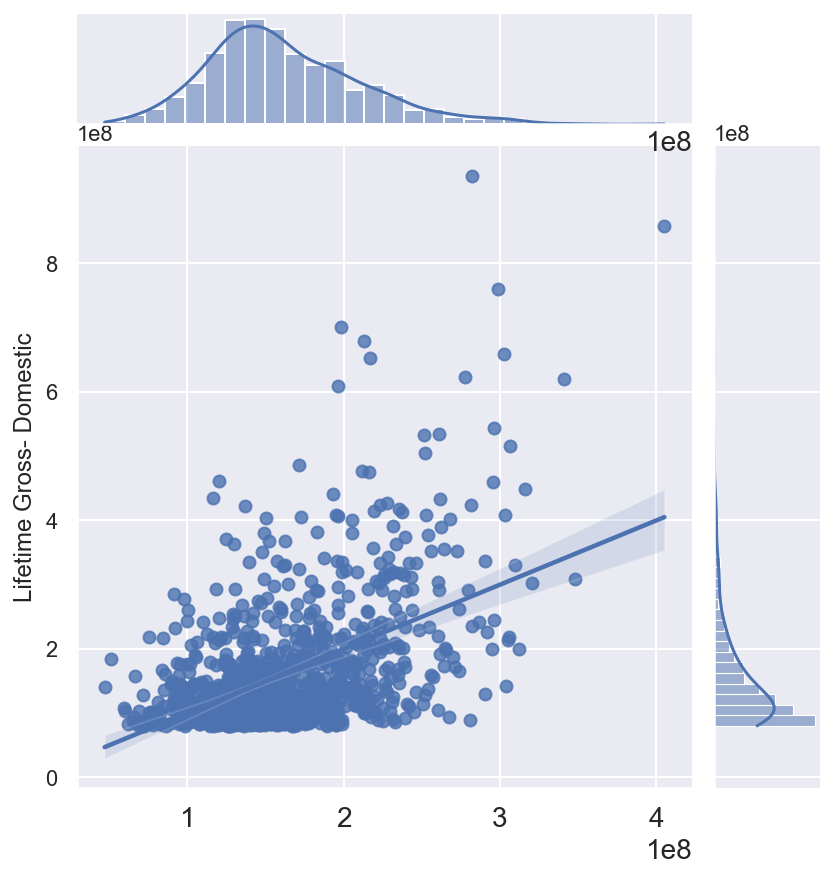

In [260]:
preds = lm.predict(X) # generate predictions (on training data) using fit model

sns.jointplot(x=preds,y=y, kind='reg')

In [267]:
#run evaluation metrics
def SSE(actuals, preds):
    return np.sum((actuals - preds)**2)

print('Results of SSE:', SSE(y,preds))


def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

print('Results of RMSE:', RMSE(y,preds))

def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

print('Results of MAE:',MAE(y,preds))

print('Results of Rsq:',lm.score(X,y))

Results of SSE: 7.554580157457203e+18
Results of RMSE: 86917087.83350489
Results of MAE: 59498731.06555258
Results of Rsq: 0.24465376515831172


In [268]:
#Validation Scheme - Simple

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [278]:
#Set up all models : linear, ridge, and polynomial
lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

#validate using validation data
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.184
Ridge Regression val R^2: 0.184
Degree 2 polynomial regression val R^2: 0.171


In [279]:
#re-checking RMSE
RMSE(lm_reg.predict(X_val_scaled),y_val)

91805645.41149735

In [271]:
#poor scores across the board, linear and ridge were tied

list(zip(features,lm_reg.coef_))

[('Year Released', 9164893.702449236),
 ('Running Time', 22993651.964791354),
 ('Rating', -13259094.482112754),
 ('Budget', 35152276.29637393),
 ('Earliest Release Month', -3151311.8123785458),
 ('Top Genres', -1965504.2507923688),
 ('Top Distributors', 846872.693344254)]

In [297]:
#Adding Polynomial Features with code split and validation 

X = condensed_df[features]
y= condensed_df[target]

def split_and_validate(X, y):

   
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')

In [298]:
split_and_validate(X, y)


Validation R^2 score was: 0.24576998411282647
Feature coefficient results: 

Year Released : 941188.21
Running Time : 1172254.44
Rating : -17561330.71
Budget : 0.61
Earliest Release Month : -578307.92
Top Genres : -31229371.07
Top Distributors : 2360055.61


In [304]:
X2 = X.copy()

X2['budgetsq'] = X2['Budget'] ** 2
X2['Yearsq'] = X2['Year Released'] ** 2

split_and_validate(X2, y)# slight increase


Validation R^2 score was: 0.25269185685439555
Feature coefficient results: 

Year Released : -54.94
Running Time : 717166.68
Rating : 10533.27
Budget : -0.41
Earliest Release Month : -57904.02
Top Genres : -115.99
Top Distributors : 307.52
budgetsq : 0.00
Yearsq : 189.75


In [311]:
X3 = X2.copy()
#connection between budget and distributor
X3['ratingsq'] = X3['Rating']**2

split_and_validate(X2, y)# no change


Validation R^2 score was: 0.25269185685439555
Feature coefficient results: 

Year Released : -54.94
Running Time : 717166.68
Rating : 10533.27
Budget : -0.41
Earliest Release Month : -57904.02
Top Genres : -115.99
Top Distributors : 307.52
budgetsq : 0.00
Yearsq : 189.75


In [312]:
#Add in Lasso
from sklearn.pipeline import Pipeline

std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

/Users/Christopher/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

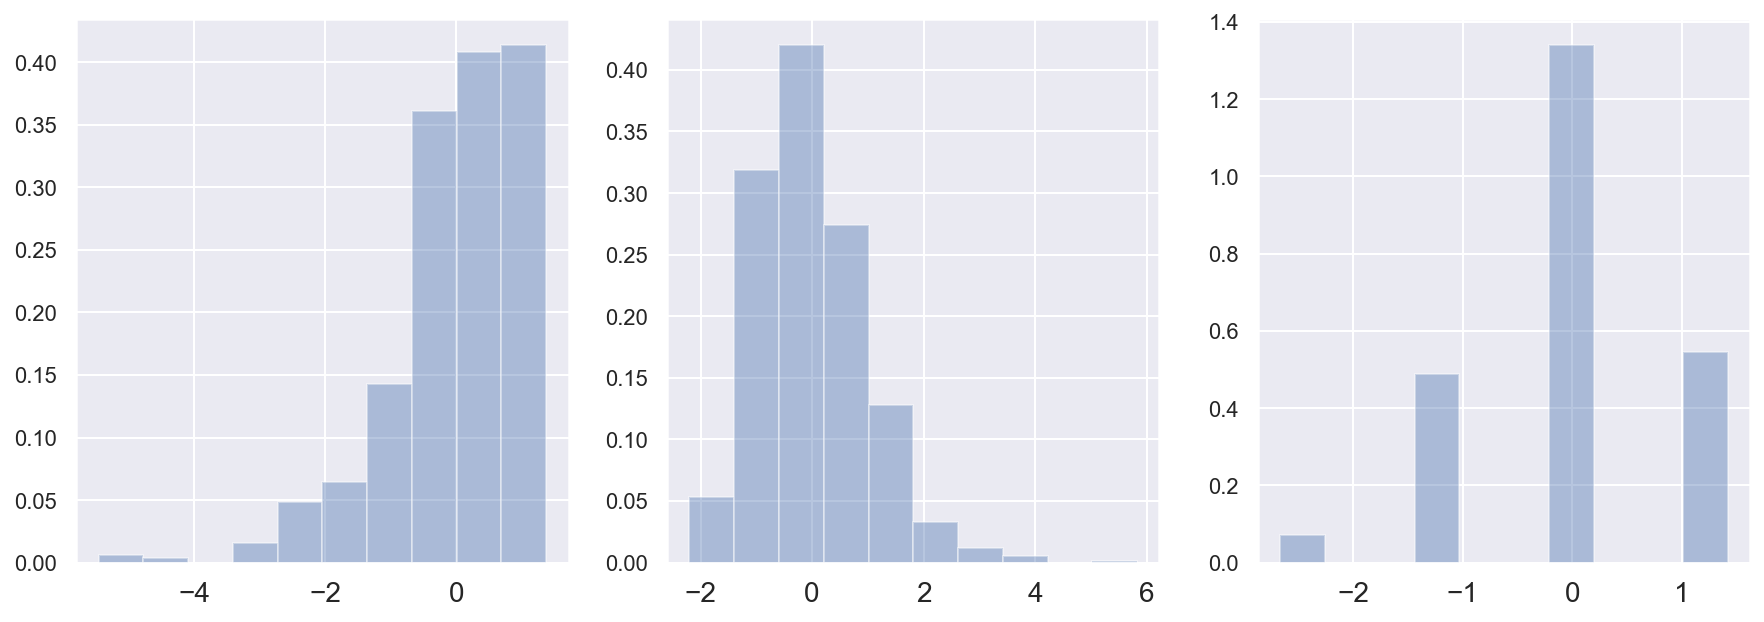

In [314]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(X_tr[:, 0], label='feature 1', ax=axes[0], kde=False, bins=10, norm_hist=True)
sns.distplot(X_tr[:, 1], label='feature 2', ax=axes[1], kde=False, bins=10, norm_hist=True)
sns.distplot(X_tr[:, 2], label='feature 3', ax=axes[2], kde=False, bins=10, norm_hist=True)

In [315]:
lasso_model = Lasso(alpha = 10000)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=10000)

In [316]:
list(zip(X_train.columns, lasso_model.coef_))

[('Year Released', 9159942.492447095),
 ('Running Time', 23007405.470013898),
 ('Rating', -13264882.653291924),
 ('Budget', 35188473.29963738),
 ('Earliest Release Month', -3147140.9776124484),
 ('Top Genres', -1957766.8453266125),
 ('Top Distributors', 831533.4118476687)]

<BarContainer object of 7 artists>

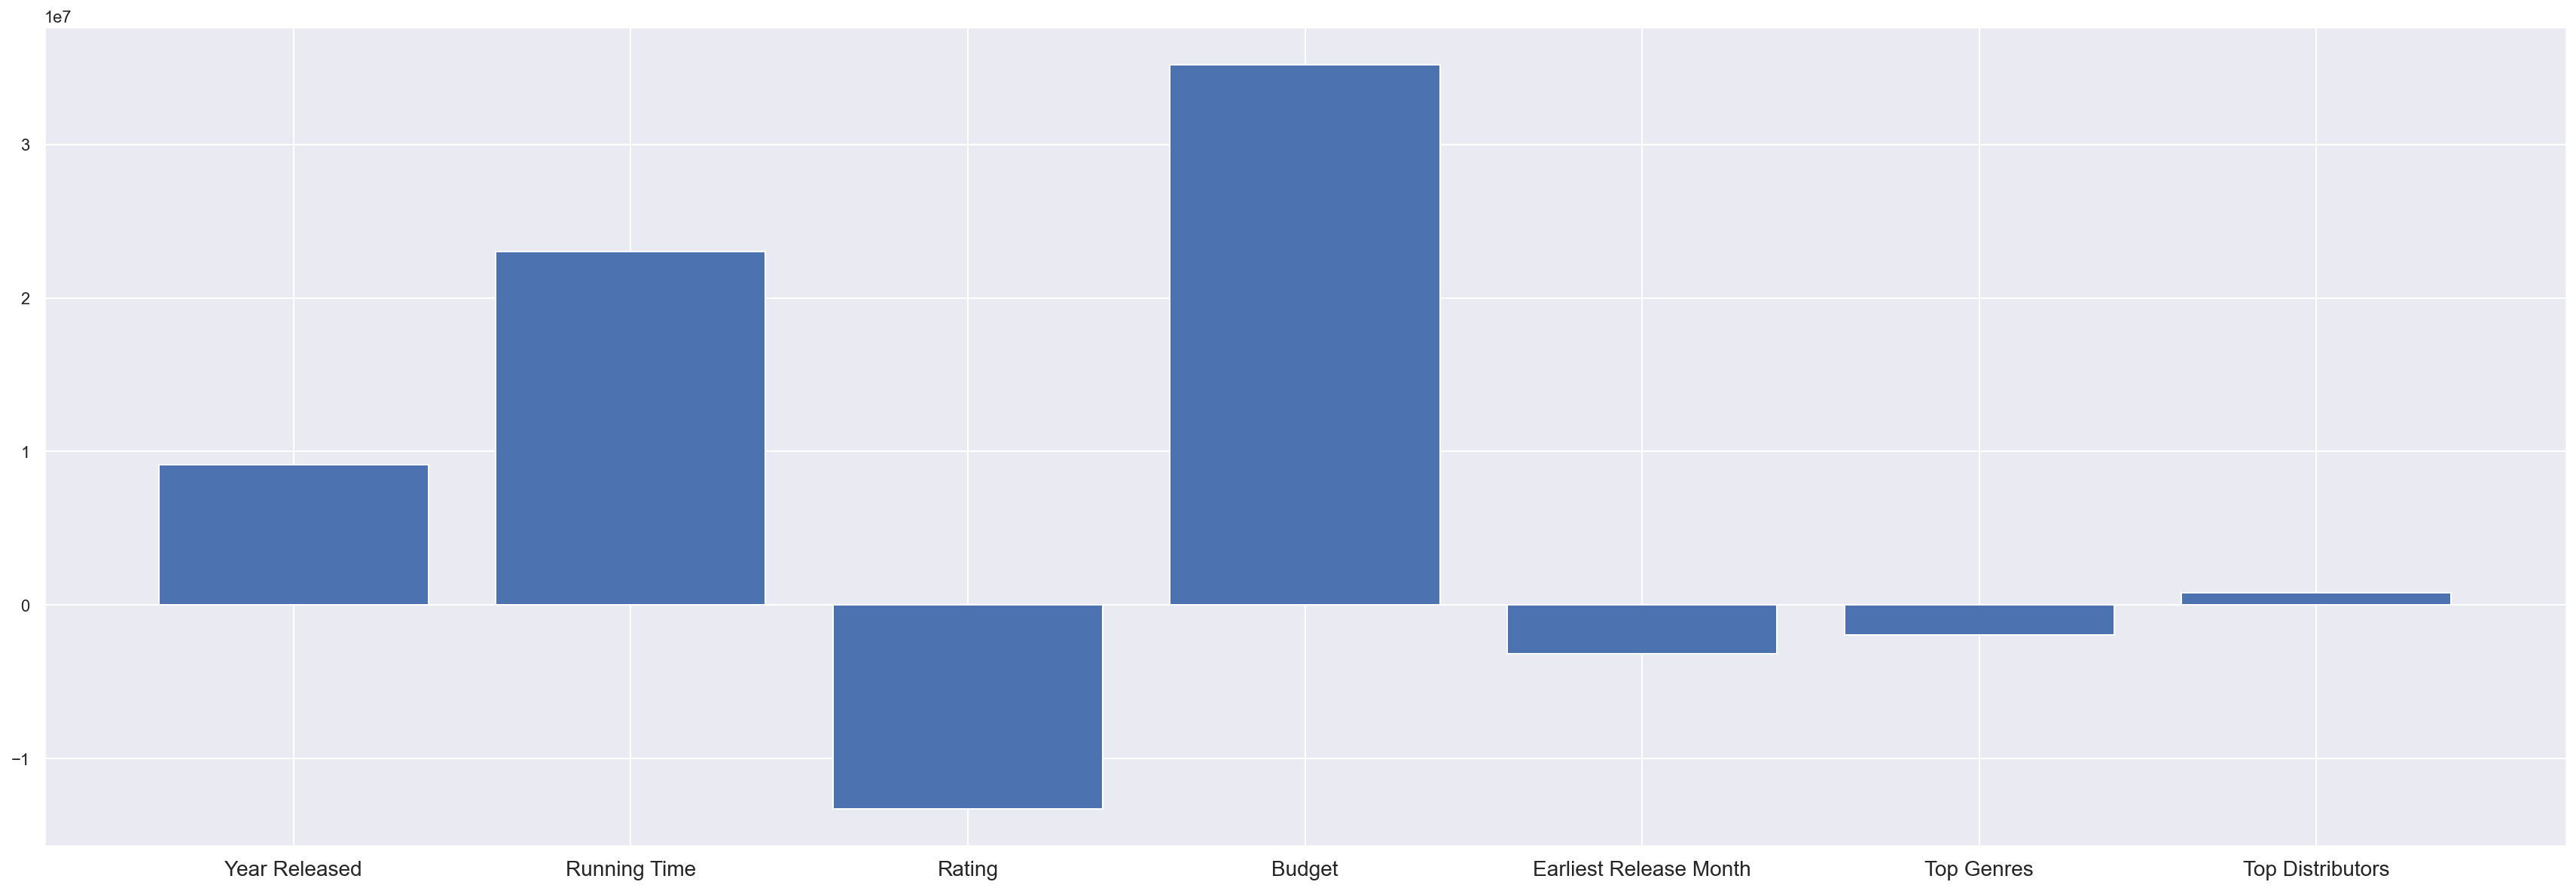

In [317]:
#Displays the effect of each feature
plt.figure(figsize=(30,10))
plt.rc('xtick', labelsize=14)
plt.bar(X_train.columns,lasso_model.coef_)

In [322]:
#finding the best alpha for lasso- as it has minimized excessive features

alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,features].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,features].values)
    err_vec_val[i] = MAE(y_val, val_set_pred)

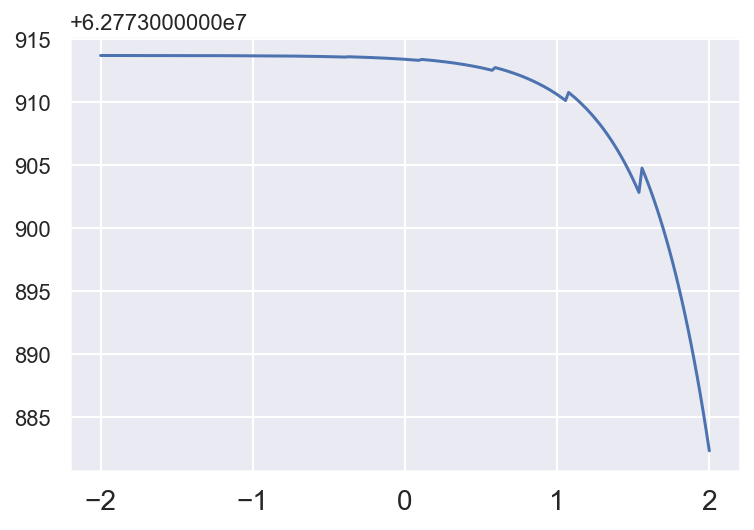

In [323]:
plt.plot(np.log10(alphalist), err_vec_val)

In [324]:
#minimum error
np.min(err_vec_val)

62773882.33058478

In [325]:
#lowest alpha for error
alphalist[np.argmin(err_vec_val)]

100.0

In [326]:
#re-running lasso
lasso_model_low = Lasso(alpha = 100)
lasso_model_low.fit(X_tr,y_train)

Lasso(alpha=100)

In [329]:
list(zip(X_train.columns, lasso_model_low.coef_))

[('Year Released', 9169822.130875155),
 ('Running Time', 23022048.669603743),
 ('Rating', -13279990.948518433),
 ('Budget', 35187867.58367256),
 ('Earliest Release Month', -3157034.114396069),
 ('Top Genres', -1969940.5015632154),
 ('Top Distributors', 839847.56202678)]

<BarContainer object of 7 artists>

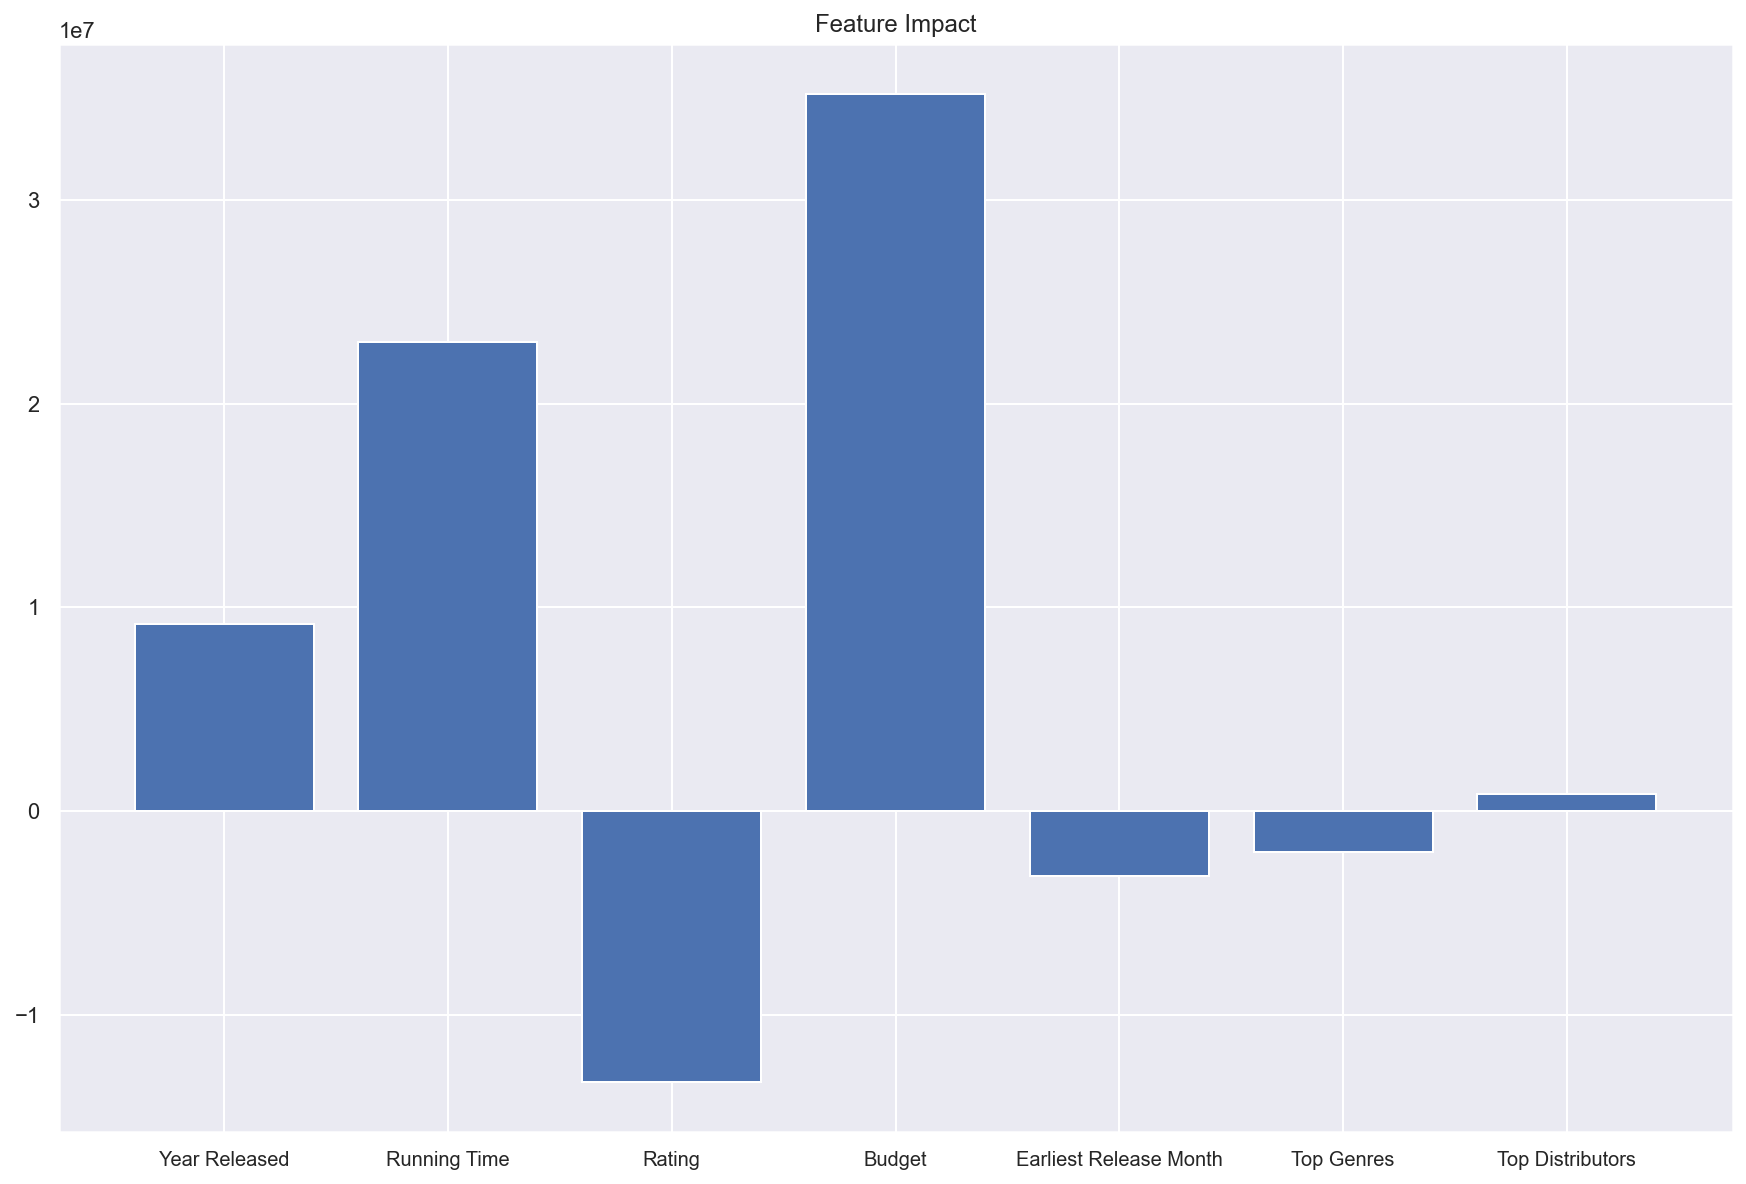

In [389]:
#Displays the effect of each feature
plt.figure(figsize=(15,10))
plt.title('Feature Impact')
plt.rc('xtick', labelsize=10)
plt.bar(X_train.columns,lasso_model_low.coef_)

In [334]:
test_set_pred = lasso_model_low.predict(X_te)

In [335]:
mae(y_test, test_set_pred)

58891110.00979011

In [336]:
from sklearn.metrics import r2_score
r2_score(y_test, test_set_pred)

0.26962725734312787

(array([ 60.,  80., 100., 120., 140., 160., 180., 200., 220., 240.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

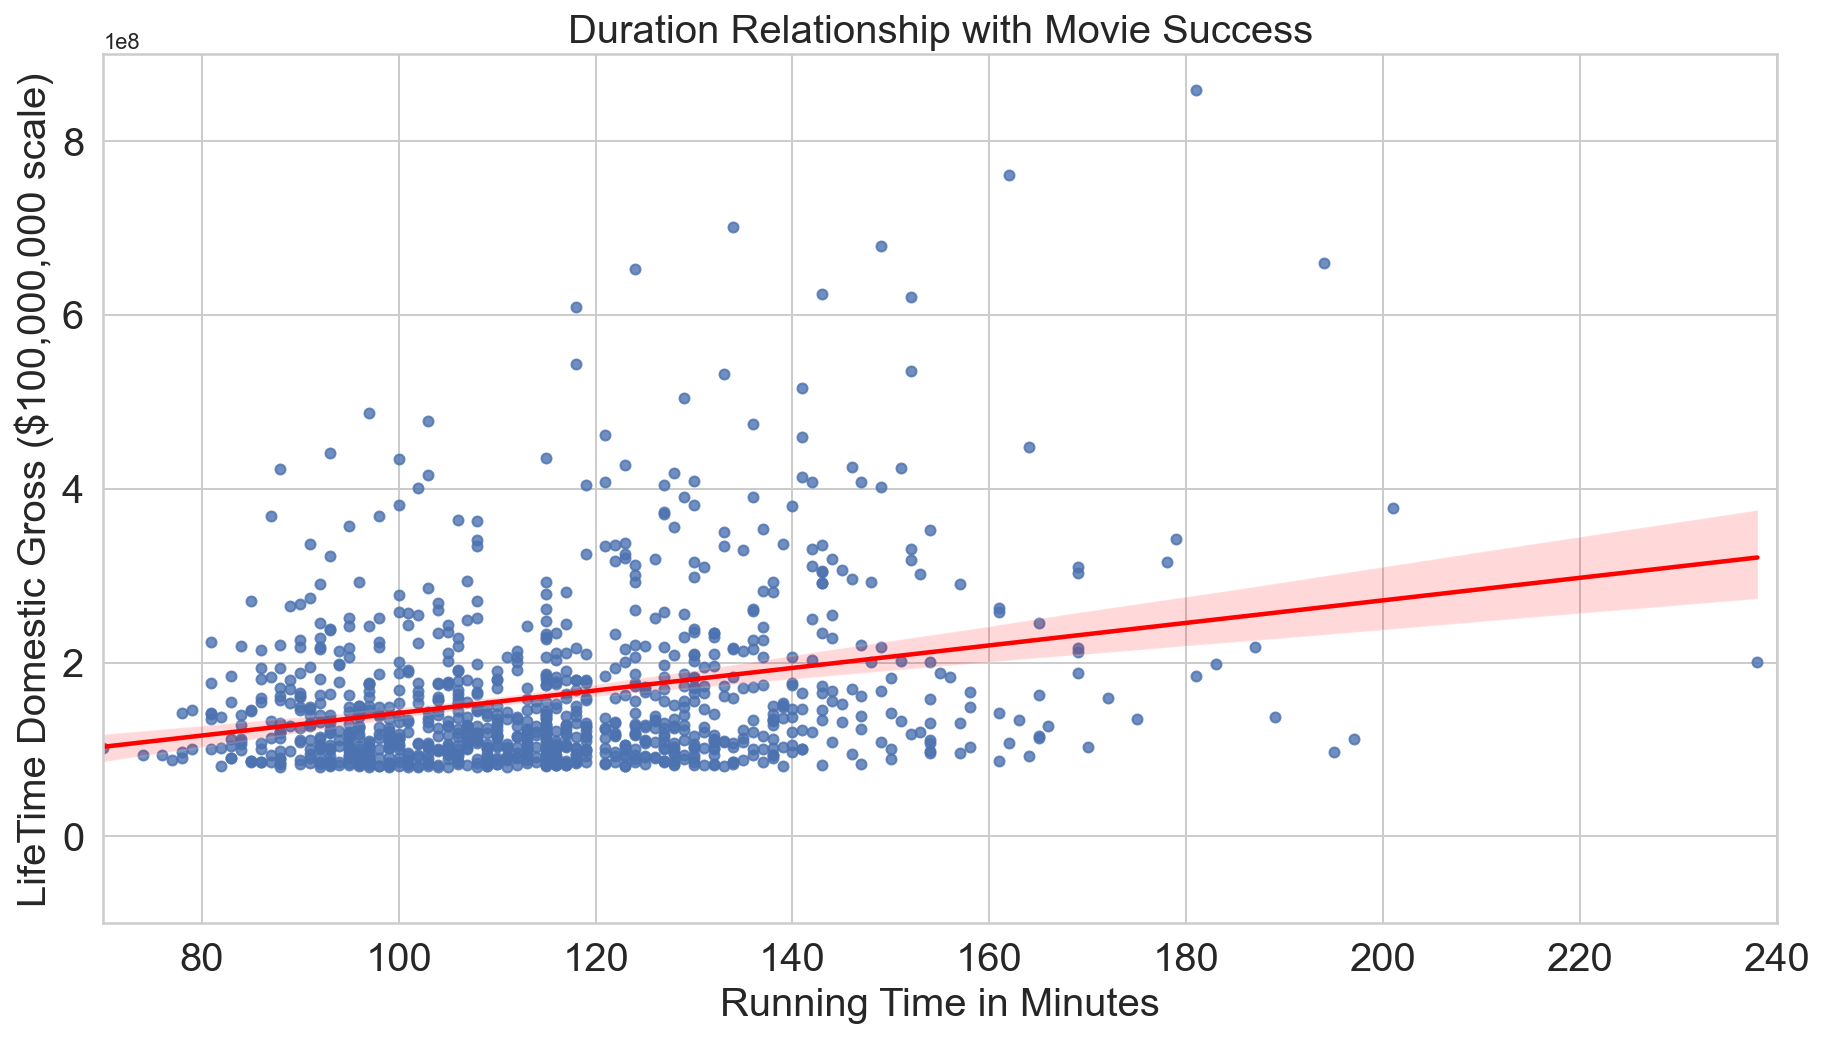

In [390]:
#use sns regplot for visualizations
sns.set( rc = {'figure.figsize' : ( 15, 8 ),  
               'axes.labelsize' : 30 }) 
sns.set_style('whitegrid') 
sns.regplot(data = condensed_df, x = 'Running Time', y = 'Lifetime Gross- Domestic', scatter_kws ={'s':25}, line_kws ={'color':'red'}, fit_reg = True);
plt.title('Duration Relationship with Movie Success', fontsize = 20);
plt.xlabel( "Running Time in Minutes" , size = 20 ) 
plt.ylabel( "LifeTime Domestic Gross ($100,000,000 scale)" , size = 20 ) 
plt.ylim(-100000000, 900000000)
plt.xlim(70, 240)
plt.yticks(size = 20)
plt.xticks(size = 20)

(array([0.0e+00, 5.0e+07, 1.0e+08, 1.5e+08, 2.0e+08, 2.5e+08, 3.0e+08,
        3.5e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

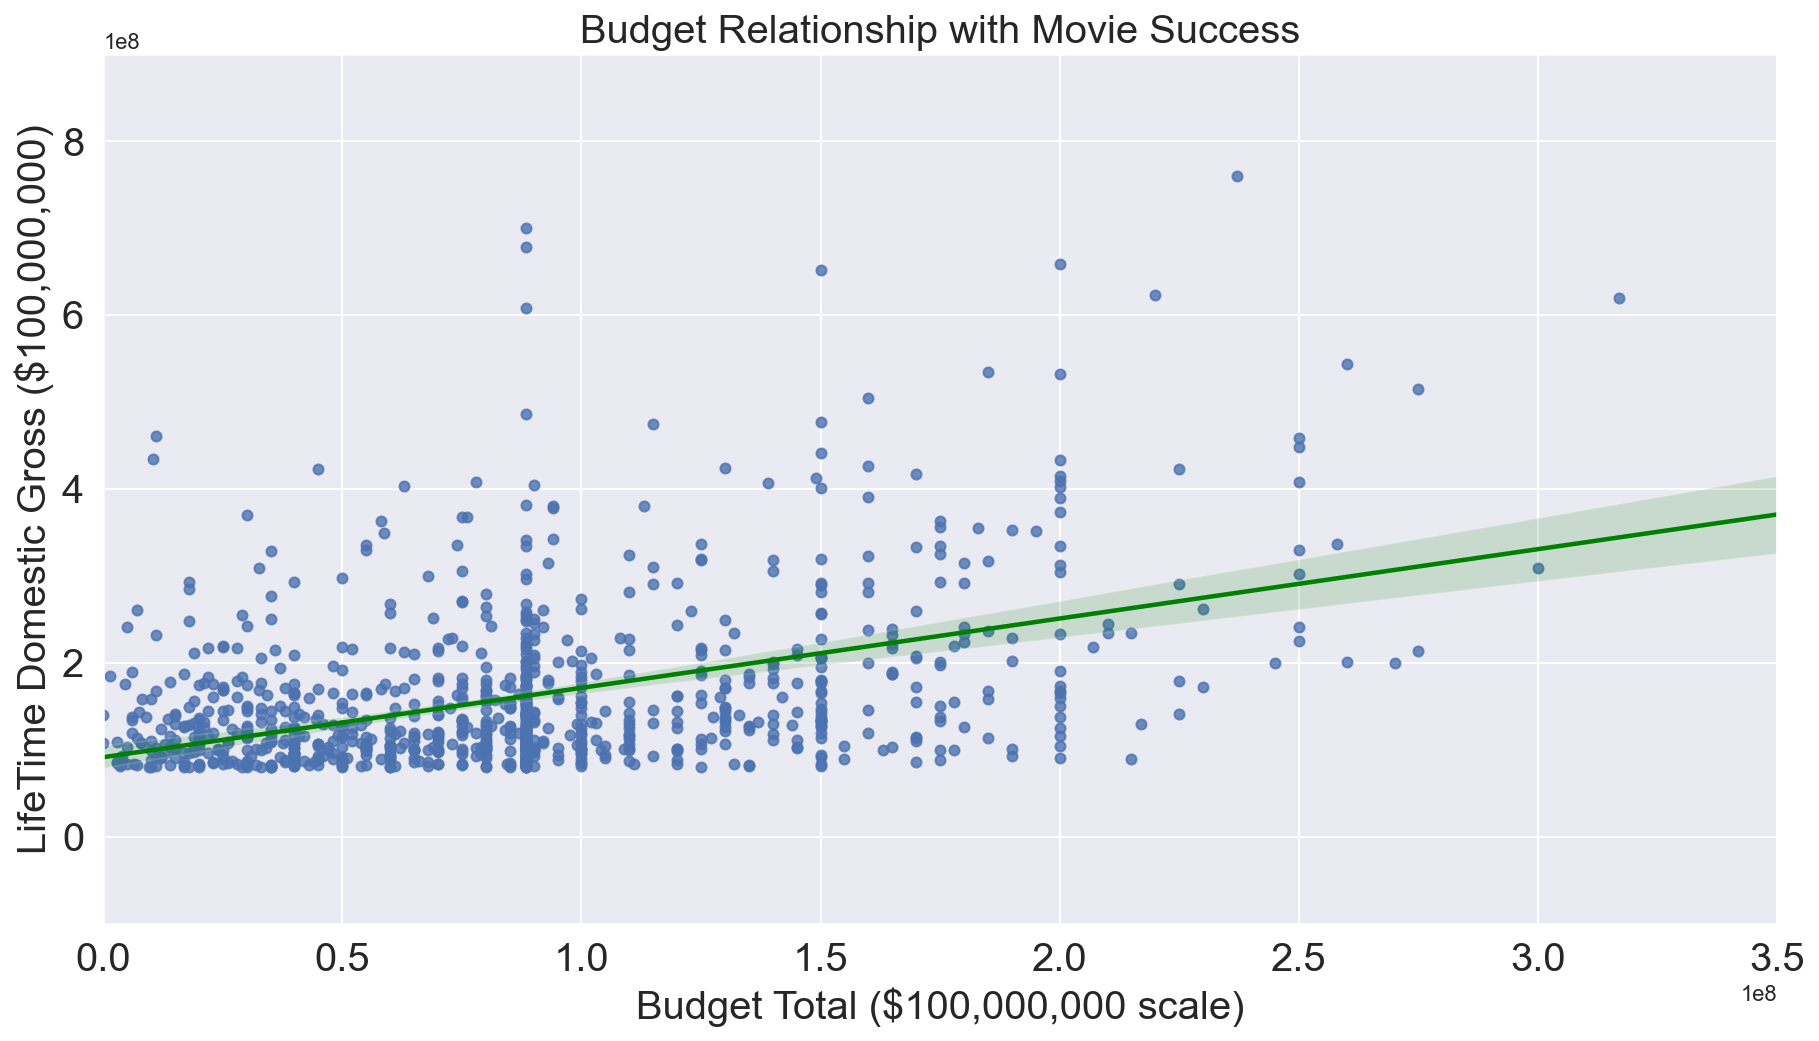

In [370]:
#budget relationship visualization
sns.set( rc = {'figure.figsize' : ( 15, 8 ),  
               'axes.labelsize' : 30 }) 
#sns.set_style('whitegrid') 
sns.regplot(data = condensed_df, x = 'Budget', y = 'Lifetime Gross- Domestic', scatter_kws ={'s':25}, line_kws ={'color':'green'});
plt.title('Budget Relationship with Movie Success', fontsize = 20);
plt.xlabel( "Budget Total ($100,000,000 scale)" , size = 20 ) 
plt.ylabel( "LifeTime Domestic Gross ($100,000,000)" , size = 20 ) 
plt.ylim(-100000000, 900000000)
plt.xlim(0, 300000000)
plt.yticks(size = 20)
plt.xticks(size = 20)

(array([1940., 1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020.,
        2030.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

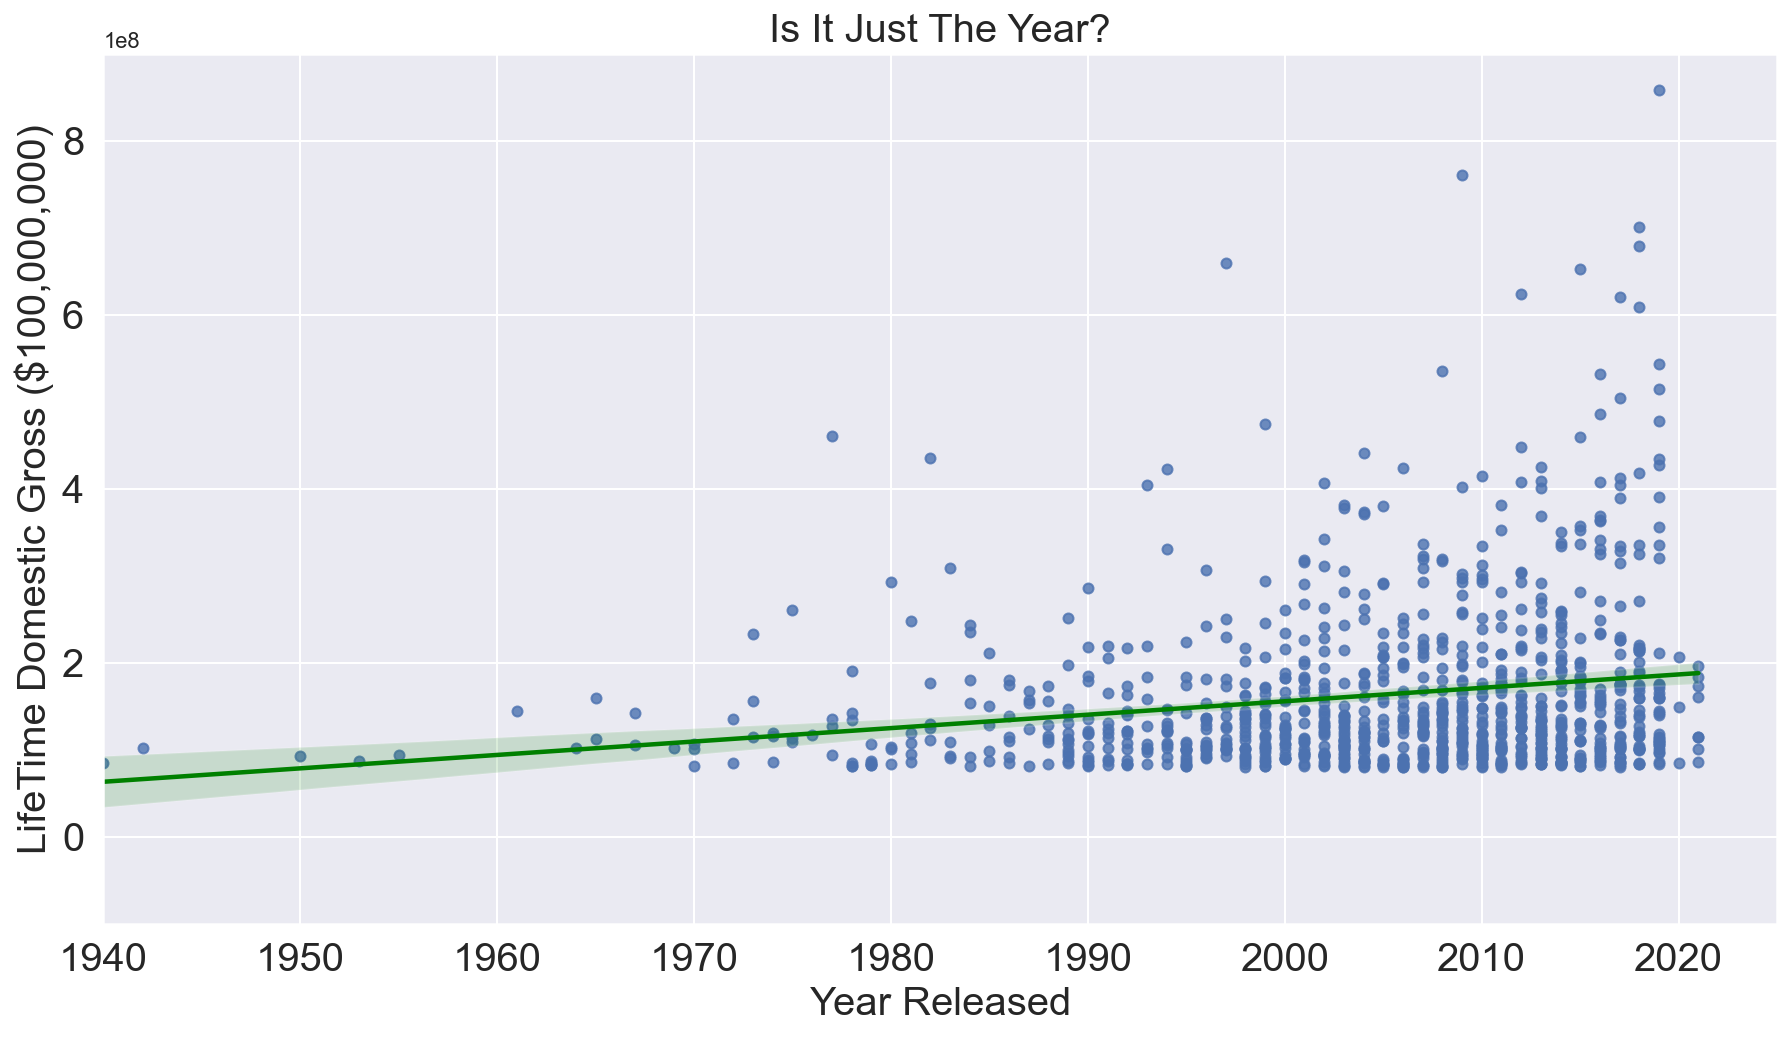

In [382]:
#Year relationship visualization
sns.set( rc = {'figure.figsize' : ( 15, 8 ),  
               'axes.labelsize' : 30 }) 
#sns.set_style('whitegrid') 
sns.regplot(data = condensed_df, x = 'Year Released', y = 'Lifetime Gross- Domestic', scatter_kws ={'s':25}, line_kws ={'color':'green'});
plt.title('Is It Just The Year?', fontsize = 20);
plt.xlabel( "Year Released", size = 20 ) 
plt.ylabel( "LifeTime Domestic Gross ($100,000,000)" , size = 20 ) 
plt.ylim(-100000000, 900000000)
plt.xlim(1940, 2025)
plt.yticks(size = 20)
plt.xticks(size = 20)